In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import cv2
import os
import PIL
import tensorflow as tf
from PIL import Image

from pathlib import Path
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
data_dir = Path("/kaggle/input/wheat-research-new-datase")
data_dir

PosixPath('/kaggle/input/wheat-research-new-datase')

In [6]:
data_list = list(data_dir.glob('*/*.jpg'))
data_list

[PosixPath('/kaggle/input/wheat-research-new-datase/crop patches/Patched (38).jpg'),
 PosixPath('/kaggle/input/wheat-research-new-datase/crop patches/Patched (57).jpg'),
 PosixPath('/kaggle/input/wheat-research-new-datase/crop patches/Patched (23).jpg'),
 PosixPath('/kaggle/input/wheat-research-new-datase/crop patches/Patched (8).jpg'),
 PosixPath('/kaggle/input/wheat-research-new-datase/crop patches/Patched (58).jpg'),
 PosixPath('/kaggle/input/wheat-research-new-datase/crop patches/Patched (26).jpg'),
 PosixPath('/kaggle/input/wheat-research-new-datase/crop patches/Patched (53).jpg'),
 PosixPath('/kaggle/input/wheat-research-new-datase/crop patches/Patched (32).jpg'),
 PosixPath('/kaggle/input/wheat-research-new-datase/crop patches/Patched (54).jpg'),
 PosixPath('/kaggle/input/wheat-research-new-datase/crop patches/Patched (63).jpg'),
 PosixPath('/kaggle/input/wheat-research-new-datase/crop patches/Patched (15).jpg'),
 PosixPath('/kaggle/input/wheat-research-new-datase/crop patches/P

In [7]:
Wheat_images_dict = {
    'wheat' : list(data_dir.glob('wheat/*')),
     'crop patches' : list(data_dir.glob('crop patches/*')),
}

In [8]:
Wheat_labels_dict = {
    'wheat' : 0,
    'crop patches' : 1,
}

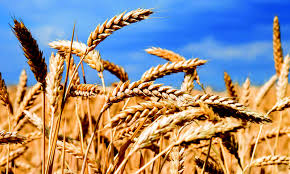

In [9]:
PIL.Image.open(Wheat_images_dict['wheat'][56])

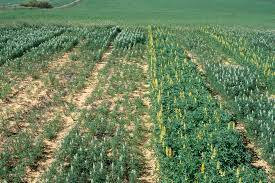

In [10]:
PIL.Image.open(Wheat_images_dict['crop patches'][25])

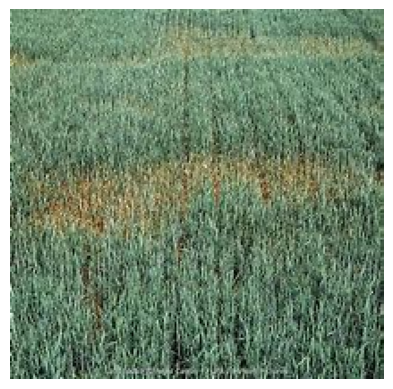

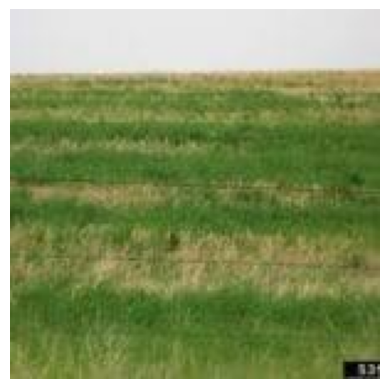

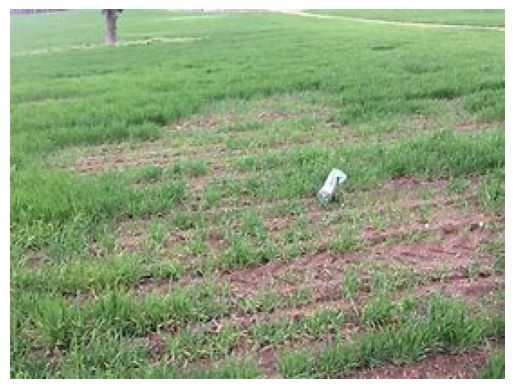

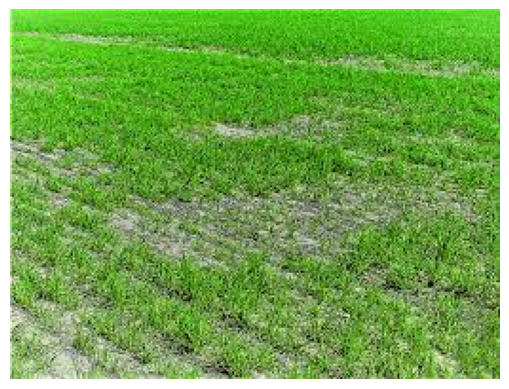

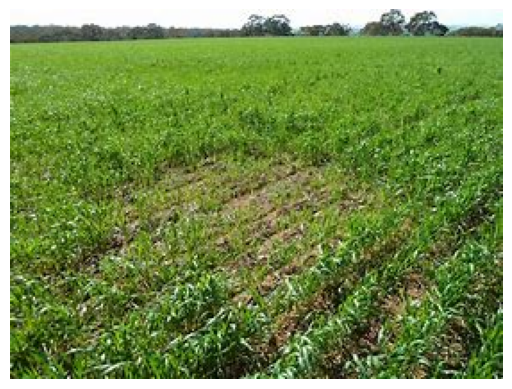

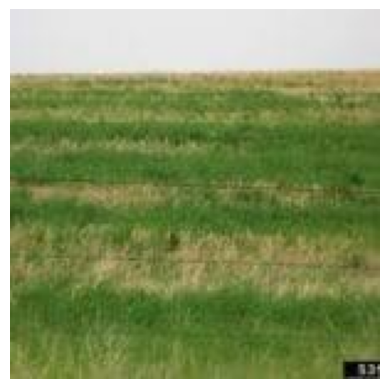

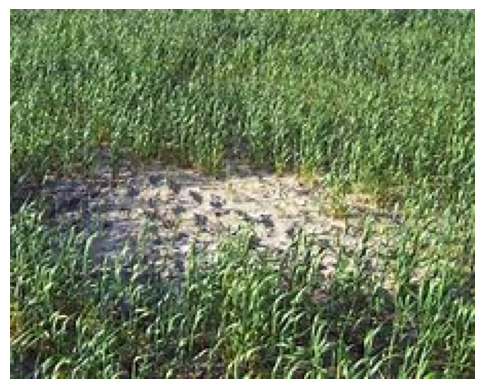

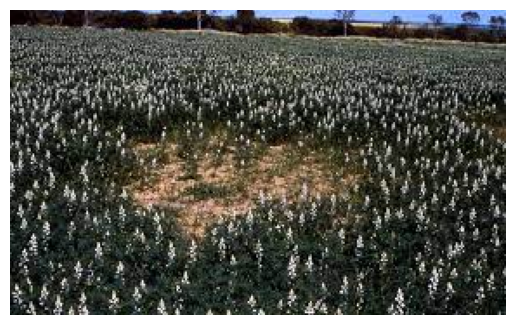

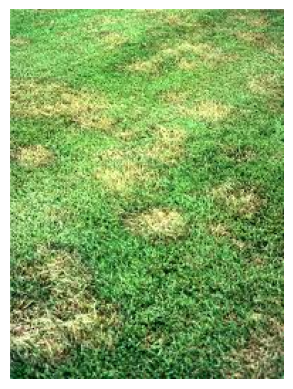

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

# Open the images
images = []
for i in range(10):
    img = Image.open(Wheat_images_dict['crop patches'][i])
    images.append(img)

# Display each image one by one
for img in images:
    plt.imshow(img)
    plt.axis('off')
    plt.show()

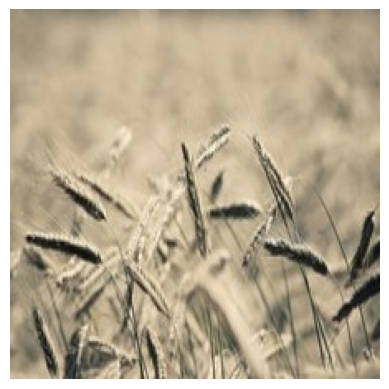

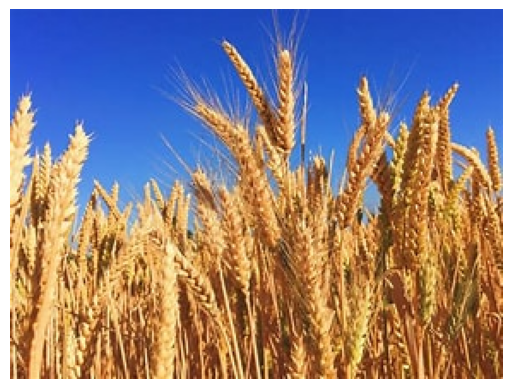

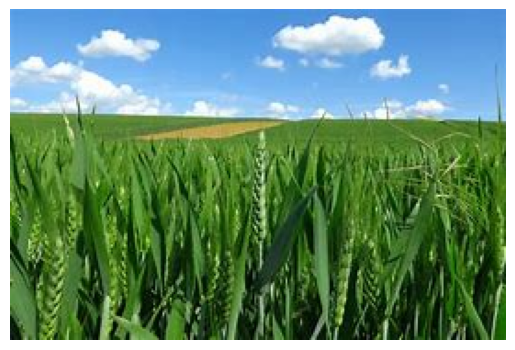

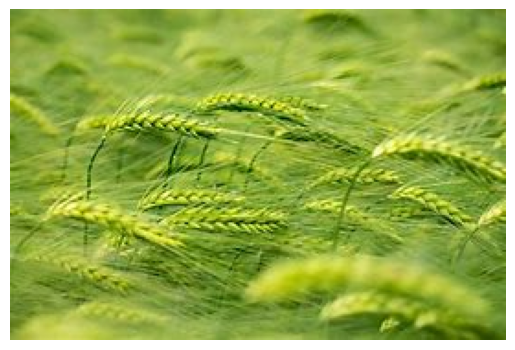

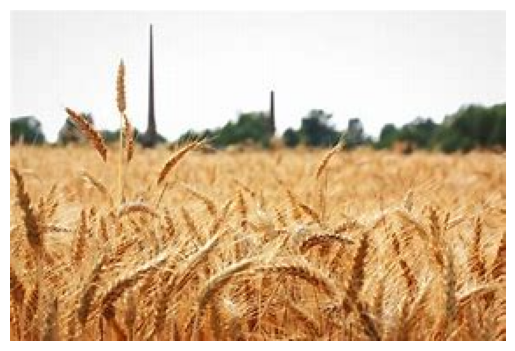

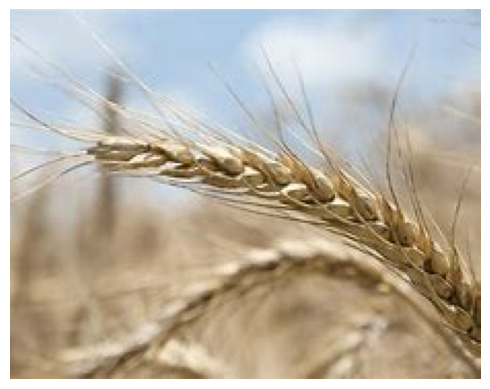

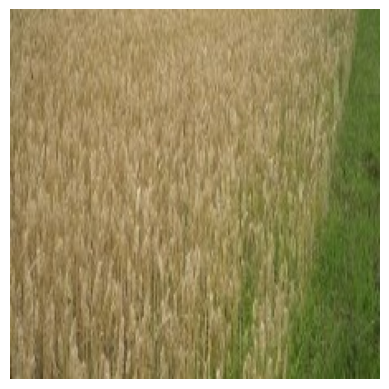

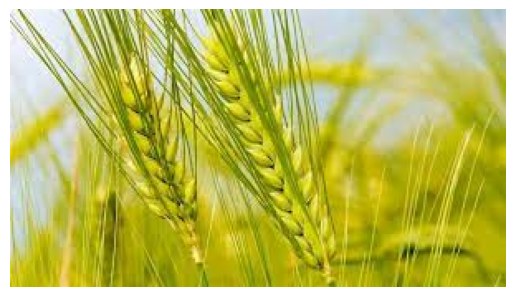

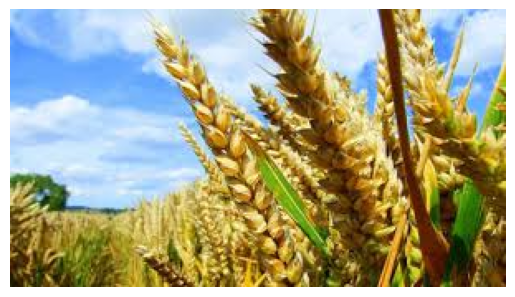

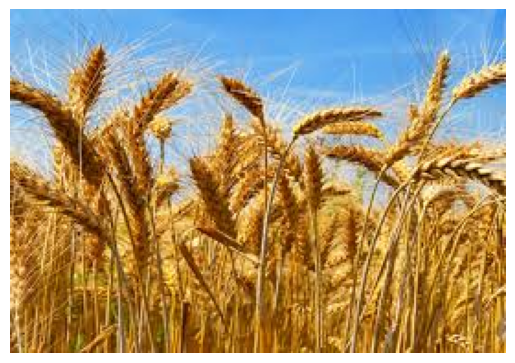

In [12]:
from PIL import Image
import matplotlib.pyplot as plt

# Open the 10 images
images = []
for i in range(10):
    img = Image.open(Wheat_images_dict['wheat'][i])
    images.append(img)

# Create a new image that combines the 10 images into a 2x5 grid
width, height = images[0].size
list_image = Image.new('RGB', (width*5, height*2))
for i in range(10):
    x = i % 5
    y = i // 5
    list_image.paste(images[i], (x*width, y*height))

# Display the grid image using matplotlib
for img in images:
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [13]:
img = cv2.imread(str(Wheat_images_dict['wheat'][0])) 
img

array([[[114, 137, 152],
        [121, 144, 159],
        [123, 146, 161],
        ...,
        [107, 123, 135],
        [108, 123, 132],
        [108, 123, 132]],

       [[115, 138, 153],
        [121, 144, 159],
        [123, 146, 161],
        ...,
        [111, 127, 139],
        [112, 127, 136],
        [112, 127, 136]],

       [[117, 140, 155],
        [121, 144, 159],
        [123, 146, 161],
        ...,
        [115, 133, 144],
        [115, 131, 143],
        [115, 131, 143]],

       ...,

       [[162, 189, 209],
        [156, 183, 203],
        [151, 181, 200],
        ...,
        [105, 124, 132],
        [106, 125, 133],
        [106, 125, 133]],

       [[159, 189, 208],
        [158, 188, 207],
        [155, 185, 204],
        ...,
        [100, 118, 125],
        [102, 120, 127],
        [104, 122, 129]],

       [[157, 187, 206],
        [160, 190, 209],
        [158, 188, 207],
        ...,
        [ 97, 115, 122],
        [100, 118, 125],
        [103, 121, 128]]

In [14]:
img.shape

(224, 224, 3)

In [15]:
cv2.resize(img, (180, 180)).shape

(180, 180, 3)

In [16]:
x ,y = [], []

for Wheat_name, images in Wheat_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(Wheat_labels_dict[Wheat_name])

In [17]:
x[0]

array([[[115, 138, 153],
        [122, 145, 159],
        [121, 144, 159],
        ...,
        [109, 125, 137],
        [108, 123, 133],
        [108, 123, 132]],

       [[116, 139, 154],
        [122, 145, 160],
        [122, 145, 160],
        ...,
        [114, 130, 142],
        [113, 129, 139],
        [113, 128, 138]],

       [[118, 141, 156],
        [122, 145, 160],
        [123, 146, 161],
        ...,
        [119, 137, 148],
        [118, 135, 146],
        [118, 134, 146]],

       ...,

       [[157, 184, 204],
        [150, 177, 197],
        [147, 176, 195],
        ...,
        [107, 126, 136],
        [110, 128, 138],
        [110, 129, 139]],

       [[160, 189, 208],
        [156, 185, 204],
        [152, 182, 201],
        ...,
        [101, 119, 126],
        [103, 121, 128],
        [104, 123, 130]],

       [[157, 187, 206],
        [159, 189, 208],
        [154, 184, 203],
        ...,
        [ 96, 114, 120],
        [ 99, 117, 124],
        [103, 121, 128]]

In [18]:
x = np.array(x)
y = np.array(y)

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [20]:
len(x_train)

135

In [21]:
len(x_test)

46

In [22]:
x_trained_scaled = x_train / 255
x_text_scaled = x_test / 255

In [23]:
num_classes = 5

model = Sequential([
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
        layers.Dense(128, activation = 'relu'),
        layers.Dense(num_classes)
])

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

In [24]:
model.fit(x_trained_scaled, y_train, epochs = 5)

Epoch 1/5
5/5 [==============================] - 4s 516ms/step - loss: 1.1339 - accuracy: 0.6000
Epoch 2/5
5/5 [==============================] - 3s 584ms/step - loss: 0.6002 - accuracy: 0.7185
Epoch 3/5
5/5 [==============================] - 3s 505ms/step - loss: 0.4375 - accuracy: 0.8667
Epoch 4/5
5/5 [==============================] - 3s 525ms/step - loss: 0.3224 - accuracy: 0.8741
Epoch 5/5
5/5 [==============================] - 3s 541ms/step - loss: 0.2398 - accuracy: 0.8963


In [25]:
model.evaluate(x_text_scaled, y_test)

2/2 [==============================] - 0s 68ms/step - loss: 0.1649 - accuracy: 0.9348


[0.16491562128067017, 0.9347826242446899]

In [26]:
prediction = model.predict(x_text_scaled)
prediction

2/2 [==============================] - 0s 67ms/step


array([[ 11.005932  ,   5.815703  ,  -4.181324  ,  -9.89      ,
         -5.1163325 ],
       [ 12.185726  ,   5.589187  ,  -5.089738  , -11.114264  ,
         -5.7825413 ],
       [ 13.171032  ,   6.559873  ,  -5.0956807 , -11.911758  ,
         -6.231437  ],
       [  7.032163  ,   9.10518   ,  -3.1788704 ,  -9.189062  ,
         -3.9603372 ],
       [  9.2902565 ,  10.233197  ,  -4.061499  , -11.091399  ,
         -4.9707103 ],
       [  6.7809067 ,   6.0913863 ,  -2.9126518 ,  -7.3514805 ,
         -3.4453    ],
       [  8.074887  ,  11.872053  ,  -3.5473711 , -10.890091  ,
         -4.633742  ],
       [  6.589501  ,  10.649175  ,  -3.2643135 ,  -9.696476  ,
         -4.066921  ],
       [  6.401553  ,   9.559474  ,  -2.9728096 ,  -8.808606  ,
         -3.735963  ],
       [ 10.974902  ,   4.795418  ,  -4.145602  ,  -9.538941  ,
         -5.03141   ],
       [  8.303852  ,   7.344523  ,  -3.4844353 ,  -8.896891  ,
         -4.281164  ],
       [  8.233072  ,  13.206169  ,  -3.778

In [27]:
score = tf.nn.softmax(prediction[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([9.9445975e-01, 5.5398680e-03, 2.5225847e-07, 8.3675744e-10,
       9.9032228e-08], dtype=float32)>

In [28]:
np.argmax(score)

0

In [29]:
y_test[3]

1

In [30]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                input_shape = (180,180,3))
])

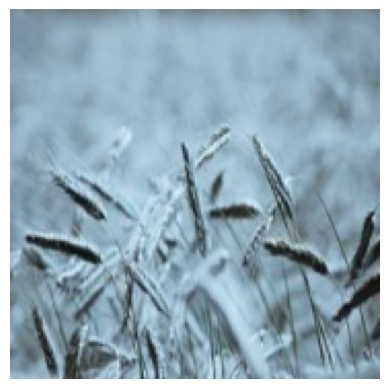

In [31]:
plt.axis('off')
plt.imshow(x[0])

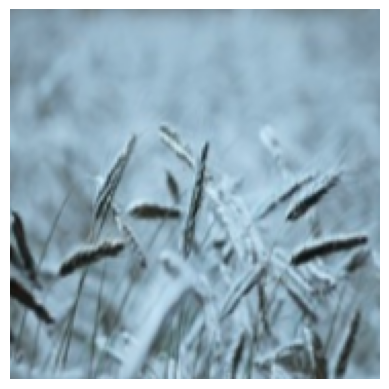

In [32]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

In [33]:
num_classes = 5

model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
        layers.Dense(128, activation = 'relu'),
        layers.Dense(num_classes)
])

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

In [34]:
model.fit(x_trained_scaled, y_train, epochs = 10)

Epoch 1/10
5/5 [==============================] - 9s 609ms/step - loss: 1.3586 - accuracy: 0.5556
Epoch 2/10
5/5 [==============================] - 3s 662ms/step - loss: 0.5744 - accuracy: 0.6593
Epoch 3/10
5/5 [==============================] - 3s 577ms/step - loss: 0.5063 - accuracy: 0.7185
Epoch 4/10
5/5 [==============================] - 3s 609ms/step - loss: 0.4365 - accuracy: 0.8222
Epoch 5/10
5/5 [==============================] - 3s 574ms/step - loss: 0.3609 - accuracy: 0.8519
Epoch 6/10
5/5 [==============================] - 3s 578ms/step - loss: 0.3144 - accuracy: 0.8741
Epoch 7/10
5/5 [==============================] - 3s 588ms/step - loss: 0.3000 - accuracy: 0.8444
Epoch 8/10
5/5 [==============================] - 3s 597ms/step - loss: 0.2555 - accuracy: 0.8815
Epoch 9/10
5/5 [==============================] - 3s 596ms/step - loss: 0.3498 - accuracy: 0.8519
Epoch 10/10
5/5 [==============================] - 3s 586ms/step - loss: 0.2471 - accuracy: 0.8963


In [35]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [36]:
model.evaluate(x_text_scaled,y_test)

2/2 [==============================] - 0s 67ms/step - loss: 0.2636 - accuracy: 0.9130


[0.2635580897331238, 0.9130434989929199]

In [37]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [38]:
model.save("patch.pkl")

In [39]:
model = load_model('/kaggle/working/patch.pkl')

In [40]:
x_test

array([[[[188, 122,  73],
         [189, 123,  74],
         [189, 123,  74],
         ...,
         [217, 173, 132],
         [217, 173, 132],
         [217, 173, 132]],

        [[189, 123,  74],
         [189, 123,  74],
         [190, 124,  75],
         ...,
         [217, 173, 132],
         [217, 173, 132],
         [217, 173, 132]],

        [[189, 123,  74],
         [190, 124,  75],
         [190, 124,  75],
         ...,
         [217, 173, 132],
         [217, 173, 132],
         [217, 173, 132]],

        ...,

        [[ 26,  59, 118],
         [ 83, 122, 179],
         [ 16,  55, 111],
         ...,
         [ 47,  99, 170],
         [ 24,  74, 145],
         [ 20,  77, 147]],

        [[ 15,  47, 103],
         [ 69, 109, 164],
         [ 54, 101, 155],
         ...,
         [ 32,  83, 155],
         [ 28,  82, 153],
         [ 22,  81, 151]],

        [[ 10,  42,  97],
         [ 59,  98, 151],
         [ 70, 118, 171],
         ...,
         [  3,  50, 122],
        

In [41]:
from PIL import Image
import numpy as np

# Open and resize the image to 180x180 pixels
img = Image.open('/kaggle/input/wheat-research-new-datase/wheat/WHEAT (15).jpg')
img = img.resize((180, 180))

# Convert the image to a numpy array
img_array = np.array(img)

# Reshape the array to match the expected input shape of the model
img_array = np.reshape(img_array, (1, 180, 180, 3))

# Pass the image array to the model for prediction
prediction = model.predict(img_array)

1/1 [==============================] - 0s 113ms/step


1/1 [==============================] - 0s 40ms/step
patched


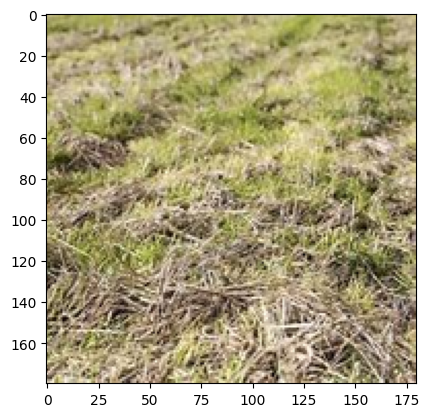

In [45]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


# Load the image and resize it to the expected size
img = Image.open('/kaggle/input/wheat-research-new-datase/crop patches/Patched (16).jpg').resize((180, 180))

# Convert the image to a numpy array and reshape it to match the expected input shape of the model
img_array = np.array(img)
img_array = np.expand_dims(img_array, axis=0)

# Pass the image to the model for prediction
prediction = model.predict(img_array)

# Determine the predicted class label
predicted_class = np.argmax(prediction)

# Check the predicted class label and take appropriate action
if predicted_class == 1:
    print('patched')
else:
    print('good')
    
plt.imshow(img)
plt.show()

In [43]:
from sklearn.metrics import accuracy_score

# Get the predicted labels for the test images
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print('The accuracy score is:', accuracy)

2/2 [==============================] - 0s 70ms/step
The accuracy score is: 0.9130434782608695
